## DataAnalysis of the Djinni vacancies for language Python

In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## Task 1. Get all tables from database

In [417]:
with sqlite3.connect("../djinni.db") as conn:
    cursor = conn.cursor()
    cursor.execute("""SELECT name FROM sqlite_master
      WHERE type='table';""")
    list_of_tables = cursor.fetchall()
    for table in list_of_tables:
        df = pd.read_sql(f"SELECT * FROM {table[0]}", conn, index_col=None)
        df.to_csv(f"{table[0]}.csv", index=False)

# Save tables to a variable

In [419]:
frameworks = pd.read_csv("framework.csv")
vacancy = pd.read_csv("vacancy.csv")
join_tables = pd.read_csv("vacancy_technologies.csv")

# Merge tables

In [420]:
merge_tabs = pd.merge(left=frameworks, right=join_tables, how="left", left_on="id", right_on="framework_id")
merge_tabs1 = pd.merge(left=merge_tabs, right=vacancy, how="right", left_on="vacancy_id", right_on="id")
merge_tabs1.drop("id_x", inplace=True, axis=1)
merge_tabs1.drop("id_y", inplace=True, axis=1)
merge_tabs1

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
0,linux,1.0,1.0,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
1,bash,2.0,1.0,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
2,docker,3.0,1.0,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
3,python,4.0,1.0,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
4,python,4.0,2.0,developer,0,junior,668,162,https://djinni.co/jobs/431369-stazher-js-pytho...
...,...,...,...,...,...,...,...,...,...
2354,python,4.0,331.0,backend engineer,5,senior,6,1,https://djinni.co/jobs/500172-senior-backend-e...
2355,aws,15.0,331.0,backend engineer,5,senior,6,1,https://djinni.co/jobs/500172-senior-backend-e...
2356,docker,3.0,332.0,backend engineer lead team,5,senior,4,0,https://djinni.co/jobs/500173-team-lead-senior...
2357,python,4.0,332.0,backend engineer lead team,5,senior,4,0,https://djinni.co/jobs/500173-team-lead-senior...


In [421]:
nan_df = merge_tabs1[merge_tabs1.isna().any(axis=1)]
merge_tabs1.dropna(how="any")

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
0,linux,1.0,1.0,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
1,bash,2.0,1.0,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
2,docker,3.0,1.0,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
3,python,4.0,1.0,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
4,python,4.0,2.0,developer,0,junior,668,162,https://djinni.co/jobs/431369-stazher-js-pytho...
...,...,...,...,...,...,...,...,...,...
2354,python,4.0,331.0,backend engineer,5,senior,6,1,https://djinni.co/jobs/500172-senior-backend-e...
2355,aws,15.0,331.0,backend engineer,5,senior,6,1,https://djinni.co/jobs/500172-senior-backend-e...
2356,docker,3.0,332.0,backend engineer lead team,5,senior,4,0,https://djinni.co/jobs/500173-team-lead-senior...
2357,python,4.0,332.0,backend engineer lead team,5,senior,4,0,https://djinni.co/jobs/500173-team-lead-senior...


# Make columns vacancy_id and framework_id as integer !

In [422]:
merge_tabs1 = merge_tabs1.fillna(0)
merge_tabs1.vacancy_id = merge_tabs1.vacancy_id.astype("int32")
merge_tabs1.framework_id = merge_tabs1.framework_id.astype("int32")
merge_tabs1

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
0,linux,1,1,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
1,bash,2,1,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
2,docker,3,1,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
3,python,4,1,developer,0,junior,275,30,https://djinni.co/jobs/518084-junior-python-de...
4,python,4,2,developer,0,junior,668,162,https://djinni.co/jobs/431369-stazher-js-pytho...
...,...,...,...,...,...,...,...,...,...
2354,python,4,331,backend engineer,5,senior,6,1,https://djinni.co/jobs/500172-senior-backend-e...
2355,aws,15,331,backend engineer,5,senior,6,1,https://djinni.co/jobs/500172-senior-backend-e...
2356,docker,3,332,backend engineer lead team,5,senior,4,0,https://djinni.co/jobs/500173-team-lead-senior...
2357,python,4,332,backend engineer lead team,5,senior,4,0,https://djinni.co/jobs/500173-team-lead-senior...


## Task 2. Display most popular frameworks in “middle” python programmers!

In [423]:
middle = merge_tabs1[merge_tabs1["lvl"] == "middle"]
partly = middle.groupby(["framework_name"], as_index = False).count()
partly.sort_values(by="framework_id", ascending=False)

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
38,python,62,62,62,62,62,62,62,62
11,docker,35,35,35,35,35,35,35,35
10,django,33,33,33,33,33,33,33,33
36,postgresql,29,29,29,29,29,29,29,29
41,redis,25,25,25,25,25,25,25,25
3,api,22,22,22,22,22,22,22,22
15,flask,20,20,20,20,20,20,20,20
17,git,20,20,20,20,20,20,20,20
5,aws,18,18,18,18,18,18,18,18
45,sql,18,18,18,18,18,18,18,18


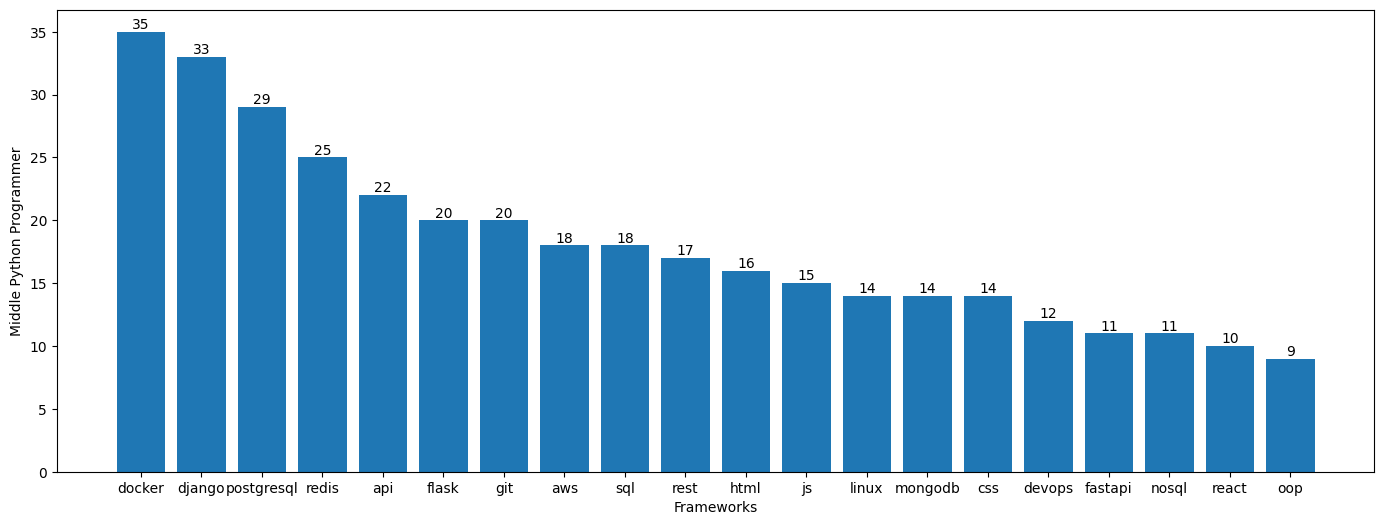

In [433]:
plt.rcParams["figure.figsize"] = (17, 6)
top_20_fw = partly.sort_values("framework_id", ascending=False)[1:21]
frameworks = top_20_fw["framework_name"]
popularity = top_20_fw["framework_id"]
barplot = plt.bar(x=frameworks, height=popularity)
plt.bar_label(barplot, labels=popularity, label_type="edge")
plt.ylabel("Middle Python Programmer")
plt.xlabel("Frameworks")
plt.show()

## Task 3. Display most popular frameworks in "junior" python programmers!

In [436]:
junior = merge_tabs1[merge_tabs1["lvl"] == "junior"]
a = junior.groupby(["framework_name"], as_index = False).count()
a.sort_values(by="framework_id", ascending=False)

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
33,python,24,24,24,24,24,24,24,24
23,linux,10,10,10,10,10,10,10,10
10,docker,9,9,9,9,9,9,9,9
2,api,7,7,7,7,7,7,7,7
35,rest,7,7,7,7,7,7,7,7
13,flask,7,7,7,7,7,7,7,7
38,sql,7,7,7,7,7,7,7,7
9,django,7,7,7,7,7,7,7,7
15,git,6,6,6,6,6,6,6,6
17,html,6,6,6,6,6,6,6,6


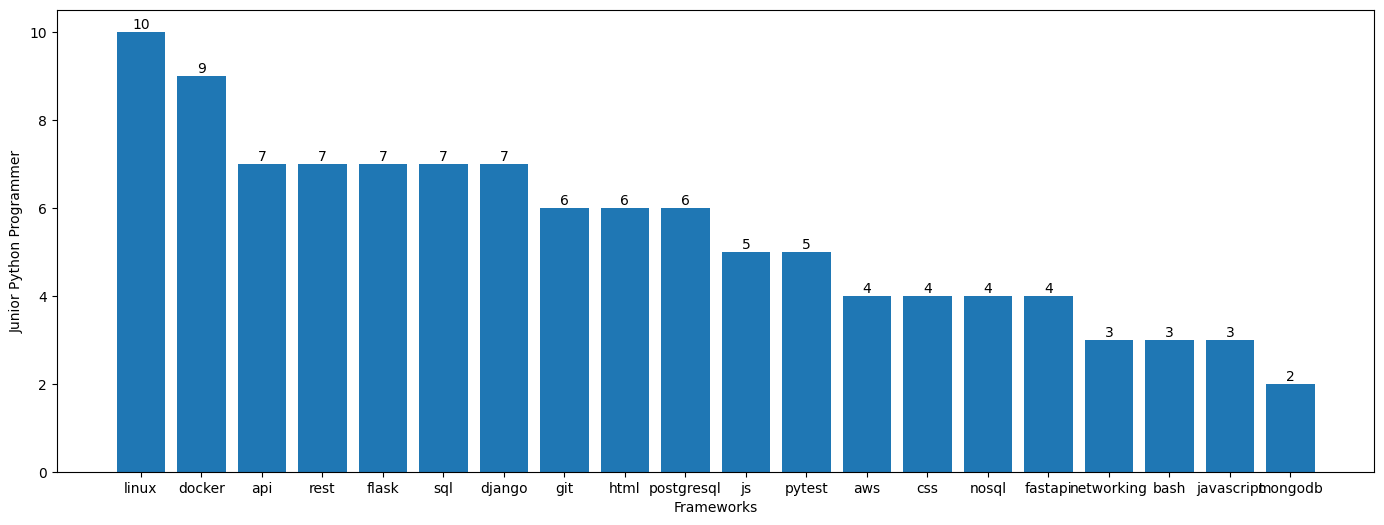

In [437]:
plt.rcParams["figure.figsize"] = (17, 6)
top_20_fw = a.sort_values("framework_id", ascending=False)[1:21]
frameworks = top_20_fw["framework_name"]
popularity = top_20_fw["framework_id"]
barplot = plt.bar(x=frameworks, height=popularity)
plt.bar_label(barplot, labels=popularity, label_type="edge")
plt.ylabel("Junior Python Programmer")
plt.xlabel("Frameworks")
plt.show()

## Task 4 Lets look for most popular frameworks in "senior" python programmers!

In [439]:
senior = merge_tabs1[merge_tabs1["lvl"] == "senior"]
b = senior.groupby(["framework_name"], as_index = False).count()
b.sort_values(by="framework_id", ascending=False)

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
39,python,97,97,97,97,97,97,97,97
5,aws,54,54,54,54,54,54,54,54
10,docker,51,51,51,51,51,51,51,51
9,django,37,37,37,37,37,37,37,37
37,postgresql,35,35,35,35,35,35,35,35
3,api,30,30,30,30,30,30,30,30
48,sql,25,25,25,25,25,25,25,25
43,rest,24,24,24,24,24,24,24,24
26,linux,22,22,22,22,22,22,22,22
14,fastapi,21,21,21,21,21,21,21,21


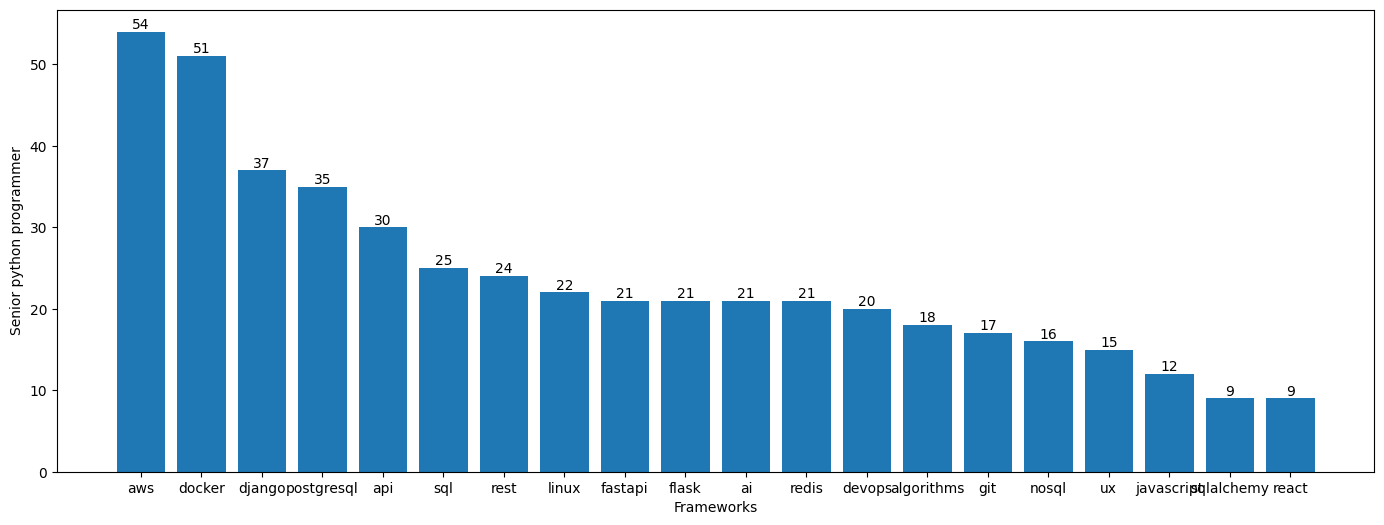

In [624]:
plt.rcParams["figure.figsize"] = (17, 6)
top_20_fw = b.sort_values("framework_id", ascending=False)[1:21]
frameworks = top_20_fw["framework_name"]
popularity = top_20_fw["framework_id"]
barplot = plt.bar(x=frameworks, height=popularity)
plt.bar_label(barplot, labels=popularity, label_type="edge")
plt.ylabel("Senior python programmer")
plt.xlabel("Frameworks")
plt.show()

## Task 5. Which specialists are more in demand?

In [ ]:
junior_tab = merge_tabs1[merge_tabs1["lvl"] == "junior"].mean()
amount_jun = len(merge_tabs1[merge_tabs1["lvl"] == "junior"].groupby("vacancy_id").count())
middle_tab = merge_tabs1[merge_tabs1["lvl"] == "middle"].mean()
amount_middle = len(merge_tabs1[merge_tabs1["lvl"] == "middle"].groupby("vacancy_id").count())
mid_sen_tab = merge_tabs1[merge_tabs1["lvl"] == "middle/senior"].mean()
mid_sen_amount = len(merge_tabs1[merge_tabs1["lvl"] == "middle/senior"].groupby("vacancy_id").count())
senior_tab = merge_tabs1[(merge_tabs1["lvl"] == "senior")].mean()
amount_senior = len(merge_tabs1[merge_tabs1["lvl"] == "senior"].groupby("vacancy_id"))

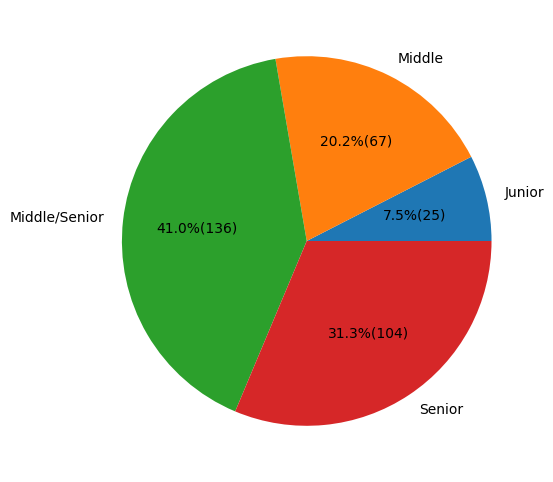

In [623]:
y = np.array([amount_jun, amount_middle, mid_sen_amount, amount_senior])
my_label = ["Junior", "Middle", "Middle/Senior", "Senior"]
plt.pie(y, labels=my_label,autopct=lambda p:f'{p:.1f}%({p*sum(y)/100:.0f})')
plt.show()

## Difference between lvl vacancy, views, applications for every python lvl!

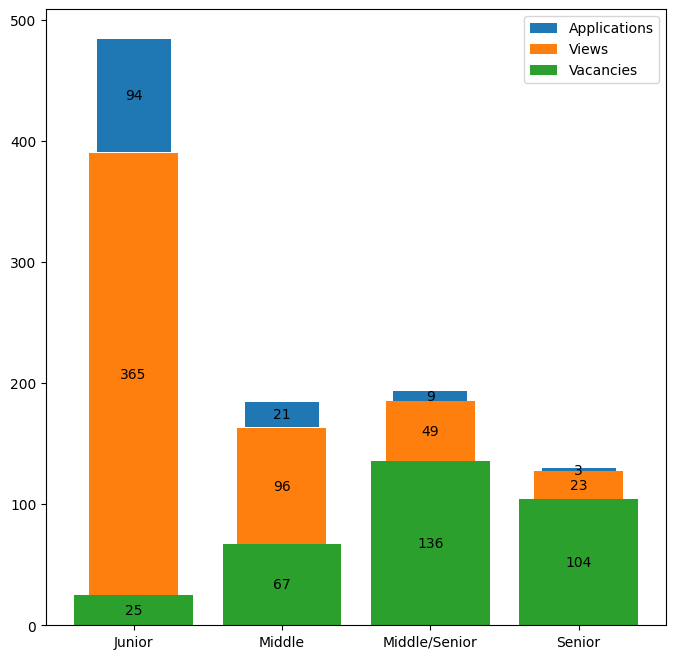

In [430]:
top = np.array([junior_tab.applications, middle_tab.applications, mid_sen_tab.applications, senior_tab.applications])
mid = np.array([junior_tab.views, middle_tab.views, mid_sen_tab.views, senior_tab.views])
low = np.array([amount_jun, amount_middle, mid_sen_amount, amount_senior])
x_label = ["Junior", "Middle", "Middle/Senior", "Senior"]
plt.rcParams["figure.figsize"] = (8, 8)
a = plt.bar(x=x_label, height=top.round(), bottom=mid+low, width=0.5)
b = plt.bar(x=x_label, height=mid.round(), bottom=low, label="views", width=0.6)
c = plt.bar(x=x_label, height=low.round(), label="vacancies", width=0.8)
plt.legend(["Applications", "Views", "Vacancies"])
plt.bar_label(c, label_type="center", color="black")
plt.bar_label(b, label_type="center", color="black")
plt.bar_label(a, label_type="center", color="black")
plt.show()

In [548]:
asd = merge_tabs1[merge_tabs1["vacancy_name"].str.contains("backend")]
asd

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
11,python,4,4,backend developer,0,junior,1304,397,https://djinni.co/jobs/514025-junior-backend-d...
12,javascript,10,4,backend developer,0,junior,1304,397,https://djinni.co/jobs/514025-junior-backend-d...
13,css,11,4,backend developer,0,junior,1304,397,https://djinni.co/jobs/514025-junior-backend-d...
14,html,12,4,backend developer,0,junior,1304,397,https://djinni.co/jobs/514025-junior-backend-d...
15,api,13,4,backend developer,0,junior,1304,397,https://djinni.co/jobs/514025-junior-backend-d...
...,...,...,...,...,...,...,...,...,...
2354,python,4,331,backend engineer,5,senior,6,1,https://djinni.co/jobs/500172-senior-backend-e...
2355,aws,15,331,backend engineer,5,senior,6,1,https://djinni.co/jobs/500172-senior-backend-e...
2356,docker,3,332,backend engineer lead team,5,senior,4,0,https://djinni.co/jobs/500173-team-lead-senior...
2357,python,4,332,backend engineer lead team,5,senior,4,0,https://djinni.co/jobs/500173-team-lead-senior...


## Let's find different between popularity of frameworks in different vacancies!

In [581]:
engineer = merge_tabs1[merge_tabs1["vacancy_name"].str.startswith("engineer") | (merge_tabs1["vacancy_name"].str.endswith("engineer"))][:300]
engineer = engineer.groupby("framework_name", as_index=False).count()
engineer = engineer.sort_values("framework_id", ascending=False)
engineer = engineer[["framework_name", "framework_id"]]
developer = merge_tabs1[merge_tabs1["vacancy_name"].str.endswith("developer") & (merge_tabs1["vacancy_name"].str.startswith("developer"))][:300]
developer = developer.groupby("framework_name", as_index=False).count()
developer = developer.sort_values("framework_id", ascending=False)
developer = developer[["framework_name", "framework_id"]]
backend = merge_tabs1[merge_tabs1["vacancy_name"].str.contains("backend")]
backend = backend.groupby("framework_name", as_index=False).count()
backend = backend.sort_values("framework_id", ascending=False)
backend = backend[["framework_name", "framework_id"]]
backend = backend[1:]
backend

,framework_name,framework_id
5,aws,24
10,docker,23
3,api,20
37,rest,13
9,django,13
40,sql,12
0,ai,10
36,redis,10
27,nosql,8
32,postgresql,8


In [582]:
developer["framework_id"] = (developer["framework_id"]).round().astype("int32")
developer = developer[1:]
developer

,framework_name,framework_id
10,django,18
11,docker,18
31,postgresql,16
36,rest,15
15,flask,15
17,git,13
19,html,12
3,api,11
23,linux,11
35,redis,10


In [583]:
engineer = engineer[1:]
engineer

,framework_name,framework_id
3,api,19
10,docker,15
23,linux,14
32,postgresql,14
41,sql,13
9,django,13
37,redis,11
5,aws,11
27,nosql,9
14,flask,9


In [596]:
df1 = pd.merge(backend,engineer, how="inner", left_on=["framework_name"], right_on=["framework_name"])
df1 = pd.merge(df1, developer, how="inner", left_on=["framework_name"], right_on=["framework_name"])
df1.rename(columns={"framework_id_x": "backend", "framework_id_y": "engineer", "framework_id": "developer"}, inplace=True)
df1 = df1[:15]
df1

,framework_name,backend,engineer,developer
0,aws,24,11,8
1,docker,23,15,18
2,api,20,19,11
3,rest,13,7,15
4,django,13,13,18
5,sql,12,13,10
6,ai,10,8,1
7,redis,10,11,10
8,nosql,8,9,4
9,postgresql,8,14,16


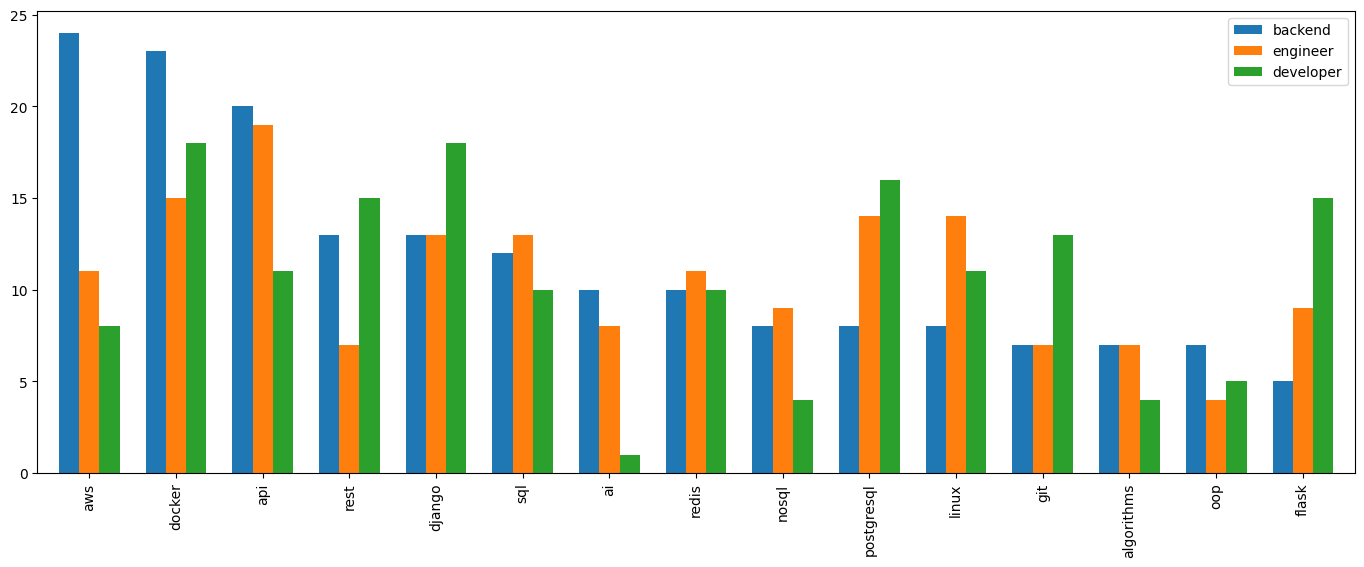

In [619]:
x = np.array(df1.framework_name)
x_axis = np.arange(len(df1.framework_name))
df1.plot.bar(width=0.7)
plt.xticks(x_axis, x)
plt.show()